**Zadanie 1 - Sumowanie liczb pojedynczej precyzji**

In [2]:
import numpy as np

In [ ]:

n = 100000000
value = 0.5312553424
A = [value] * n
result = 0
correctResult = value * n

In [ ]:
def calculateErrors(result, correctValue):
   error = abs(correctValue - result)
   relativeError = error / correctValue
   return error, relativeError

In [ ]:
for i in A:
    result += i

absoluteError, relativeError = calculateErrors(result, correctResult)

print("absolute error = ", absoluteError, "\t", "relative error = ", relativeError)

absolute error =  0.030394911766052246 	 relative error =  5.721337620576227e-10


In [19]:
import matplotlib.pyplot as plt

result = 0
steps = 0
checkpoints = 0
relativeErrorValues = []

In [ ]:
for i in A:
    steps += 1
    result += i
    if steps == 25000:
        checkpoints += 1
        correctValue = checkpoints * steps * value
        error = abs(correctValue - result)
        relativeError = error / correctValue
        relativeErrorValues.append(relativeError)
        steps = 0

x = [i * 25000 for i in range(checkpoints)]

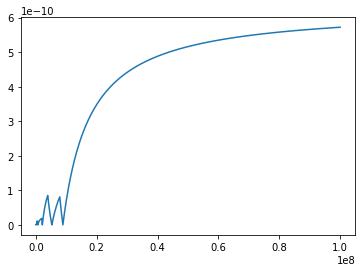

In [ ]:
plt.plot(x, relativeErrorValues)
plt.show()

In [ ]:
def sumRecursive(array):
    if len(array) == 1:
        return array[0]

    newArray = [0] * ((len(array) + 1) // 2)
    n = len(newArray)
    for i in range(n - 1):
        newArray[i] = array[2*i] + array[2*i + 1]
    newArray[n - 1] = array[2*(n-1)]
    if (len(array) % 2 == 0):
        newArray[n - 1] += array[2*(n-1) + 1]
    return sumRecursive(newArray)

In [ ]:
resultRecursive = sumRecursive(A)
absoluteErrorRecursive, relativeErrorRecursive = calculateErrors(resultRecursive, correctResult)

print("absolute error = ", absoluteErrorRecursive, "\t", "relative error = ", relativeErrorRecursive)

absolute error =  7.450580596923828e-09 	 relative error =  1.4024481265948446e-16


Jak widzimy, błąd zmalał dość znacząco. Jest to spowodowane faktem, że stosując takie rekurencyjne dodawanie dodajemy liczby o zbliżonych wielkościach. W ten sposób nie napotykamy aż tak bardzo problemu dodawania dwóch liczb o różnych rzędach wielkości który powoduje utratę cyfr znaczących.

In [ ]:
from datetime import datetime

In [ ]:
result = 0
a = datetime.now()
for i in A:
    result += i

b = datetime.now()
print("time of standard = ", b - a)

time of standard =  0:00:09.737595


In [ ]:
result = 0
a = datetime.now()
result = sumRecursive(A)
b = datetime.now()
print("time of recursive = ", b - a)

time of recursive =  0:00:28.557940


Jak widzimy zgodnie z "No free lunch theorem" za dokładniejsze działanie (mniejszy błąd) płacimy czasem wykonania. Przykładowe dane dla których algorytm rekurencyjny zwraca niezerowy błąd są podane na górze.

**Zadanie 2 - Algorytm Kahana**

In [ ]:
def sumKahan(array):
    n = len(array)
    sum = 0
    error = 0
    for i in range(n):
        y = array[i] - error
        tmp = sum + y
        error = (tmp - sum) - y
        sum = tmp
    
    return sum

In [ ]:
a = datetime.now()
resultKahan = sumKahan(A)
b = datetime.now()

absoluteErrorKahan, relativeErrorKahan = calculateErrors(resultKahan, correctResult)

print("absolute error = ", absoluteErrorKahan, "\t", "relative error = ", relativeErrorKahan)
print("time of Kahan = ", b - a)

absolute error =  0.0 	 relative error =  0.0
time of Kahan =  0:00:16.603751


Algorytm Kahana pokazuje, że z odpowiednim pomysłem można zrobić dobry i stosunkowo tani lunch. Algorytm Kahana ma lepsze własności numeryczne bo zwraca uwagę na problem gubienia liczb znaczących przy dodawania liczb o różnych rzędach. Zmienna **error** służy do akumulowania błędu wynikającego z dodawania liczb o różnych rzędach - w naszym przypadku sumy oraz małej wartości z tablicy.

**Zadanie 3 - Sumy częściowe**

Będziemy badać dwie sumy częściowe. Sumy częściowe szeregu definiującego funkcję dzeta Riemanna oraz funkcję eta Dirichleta. Wzory na te sumy częściowe to odpowiednio $\mathrm ζ(s) = ∑ \frac {1} {k^s}$ oraz $\mathrm \eta (s) = ∑ (-1)^{k-1}\frac {1} {k^s}$.


In [5]:
sValues = [2, 3.6667, 5, 7.2, 10]
nValues = [50, 100, 200, 500, 1000]

In [39]:
def sumRiemannZetaForward(s, n):
    sum = 0
    for k in range(1, n + 1):
        sum += np.float32(1 / k ** s)
        # sum += 1 / k ** s
    
    return sum

def sumRiemannZetaBackward(s, n):
    sum = 0
    for k in range(n, 0, -1):
        sum += np.float32(1 / k ** s)
        # sum += 1 / k ** s
    
    return sum

def sumDirichletEtaForward(s, n):
    sum = 0
    for k in range(1, n + 1):
        sum += np.float32((-1) ** (k-1) * 1 / k ** s)
        # sum += (-1) ** (k-1) * 1 / k ** s
    
    return sum

def sumDirichletEtaBackward(s, n):
    sum = 0
    for k in range(n, 0, -1):
        sum += np.float32((-1) ** (k-1) * 1 / k ** s)
        # sum += (-1) ** (k-1) * 1 / k ** s

    return sum

In [40]:
for i in range(len(sValues)):
    print(f"Riemann forward for s = {sValues[i]} and n = {nValues[i]} ----> {sumRiemannZetaForward(sValues[i], nValues[i])}")
    print(f"Riemann backward for s = {sValues[i]} and n = {nValues[i]} ----> {sumRiemannZetaBackward(sValues[i], nValues[i])}")
    print(f"Dirichlet forward for s = {sValues[i]} and n = {nValues[i]} ----> {sumDirichletEtaForward(sValues[i], nValues[i])}")
    print(f"Dirichlet backward for s = {sValues[i]} and n = {nValues[i]} ----> {sumDirichletEtaBackward(sValues[i], nValues[i])}")

Riemann forward for s = 2 and n = 50 ----> 1.6251327330246568
Riemann backward for s = 2 and n = 50 ----> 1.6251327330246568
Dirichlet forward for s = 2 and n = 50 ----> 0.8222710315603763
Dirichlet backward for s = 2 and n = 50 ----> 0.8222710315603763
Riemann forward for s = 3.6667 and n = 100 ----> 1.109408800461619
Riemann backward for s = 3.6667 and n = 100 ----> 1.109408800461619
Dirichlet forward for s = 3.6667 and n = 100 ----> 0.9346933183328723
Dirichlet backward for s = 3.6667 and n = 100 ----> 0.9346933183328723
Riemann forward for s = 5 and n = 200 ----> 1.036927754853072
Riemann backward for s = 5 and n = 200 ----> 1.0369277548530718
Dirichlet forward for s = 5 and n = 200 ----> 0.9721197703182377
Dirichlet backward for s = 5 and n = 200 ----> 0.9721197703182374
Riemann forward for s = 7.2 and n = 500 ----> 1.0072276665427153
Riemann backward for s = 7.2 and n = 500 ----> 1.0072276665427176
Dirichlet forward for s = 7.2 and n = 500 ----> 0.9935270005748192
Dirichlet backw

Sumując do przodu (od najmniejszej do największej) liczby zmiennopozycyjne tracimy mniej miejsc znaczących. Małe liczby sumują się do większych i w ten sposób tracimy mniej cyfr znaczących bo mniejsza jest róznica między akumulatorem a dodawaną liczbą. W tym wypadku z uwagi na wzór ciągu dodawanie do tyłu to dodawanie od najmniejszej do największej, a więc ono będzie obarczone mniejszym błędem.

In [15]:
x = 0.34824932843284093209
y = 0.63283289328432432880
z = 0.55837839149328492321
print(x, y, z)
print(np.float32(np.float32(x + y) + z))
print(np.float32(x + np.float32(y + z)))

0.34824932843284095 0.6328328932843243 0.5583783914932849
1.5394605
1.5394607


**Zadanie 4 - Błędy zaokrągleń i odwzorowanie logistyczne (dodatkowe)**

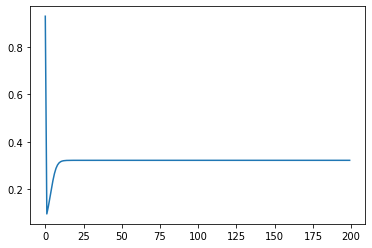

In [37]:
rValues = [0.345, 1, 1.4732, 2.120249, 3.792173189, 4]
xValues = [0.1213, 0.33289, 0.5831, 0.73923, 0.9313]

size = 200
yAxis = [0] * size 
yAxis[0] = xValues[4]

for i in range(size - 1):
    yAxis[i+1] = rValues[2] * yAxis[i] * (1 - yAxis[i])

iterations = [i for i in range(size)]
plt.plot(iterations, yAxis)
plt.show()


W zależności od parametru Dla $\mathrm r$ odwzorowania logistyczne zachowują się w różny sposób. Dla $\mathrm r \in (0, 1]$ odwzorowania dążą do 0 (osiągają je po odpowiedniej liczbie iteracji). Dla $\mathrm r \in (1, 3]$ dążą do pewnej niezerowej wartości. Dla $\mathrm r \in (3, 4]$ odwzorowania oscylują okresowo bądź zachowują się chaotycznie.

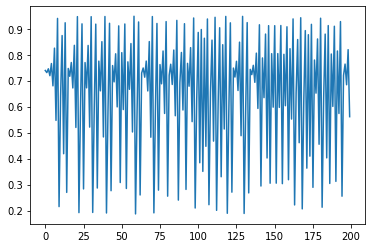

In [21]:
r = np.float32(rValues[3])
x = np.float32(xValues[3])
yAxis[0] = x
for i in range(size - 1):
    yAxis[i+1] = np.float32(r * yAxis[i] * (1 - yAxis[i]))

plt.plot(iterations, yAxis)
plt.show()

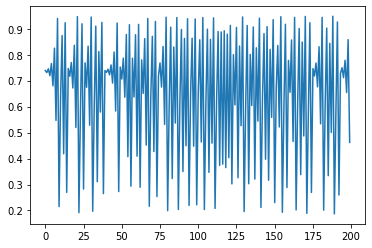

In [22]:
r = rValues[3]
x = xValues[3]
yAxis[0] = x
for i in range(size - 1):
    yAxis[i+1] = r * yAxis[i] * (1 - yAxis[i])

plt.plot(iterations, yAxis)
plt.show()

Wykresy odwzorowania logistycznego dla $\mathrm r \in [3.75, 3.8]$ i dowolnego $\mathrm x_0$ są identyczne do około 40 wyrazu. Dopiero potem następują rozbieżności w wartości dalszych wyrazów odwzorowania. Może to być spowodowane tym, że po odpowiedniej ilości operacji dostajemy liczby, które mają długie rozwinięcia dziesiętne i z tego powodu tracimy więcej liczb znaczących gdy reprezentujemy je w pojedynczej precyzji.

found zero at iteration 4358


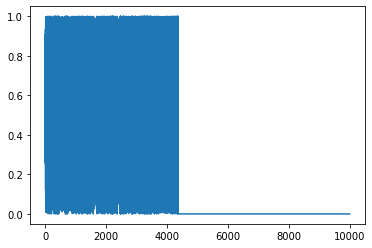

In [42]:
size = 10000
iterations = [i for i in range(size)]
r = 4
x = xValues[4]
yAxis = [0] * size
yAxis[0] = x
for i in range(size - 1):
    yAxis[i+1] = np.float32(r * yAxis[i] * (1 - yAxis[i]))
    if yAxis[i+1] == 0:
        print(f"found zero at iteration {i+1}")
        break

plt.plot(iterations, yAxis)
plt.show()

Dla wartości xValues = [0.1213, 0.33289, 0.5831, 0.73923, 0.9313] liczba iteracji potrzebna do osiągnięcia zera to odpowiednio: [1394, (nie osiąga zera dla 10e6 iteracji), 348, 3544, 4358].